<div align="center">

#   Introdução à óptica não-linear

**Autor.** Carlos Antunis Bonfim da Silva Santos

</div>

Fenômenos ópticos são parte fundamental do cotidiano humano, contudo, certos aspectos destes fenômenos são regularmente suprimidos na natureza devido à baixa intensidade dos campos eletromagnéticos utilizados. Com a descoberta do Laser, se percebeu que a altas intensidades os materiais exibem respostas não-lineares à presença de luz. Neste notebook iremos abordar as origens desses fenômenos utilizando uma descrição dos efeitos que campos intensos imprimem sobre as cargas elétricas presentes nos materiais. 

In [1]:
using GLMakie;
const mech = include("src/mechanics.jl");

<div align="center">

##  Oscilações

</div>

Iremos modelar aqui os materiais como uma coleção de cargas elétricas, o elétron de valência e o caroço iônico (núcleo e demais elétrons), sendo o elétron mais importante destes à dinâmica dado que possui mais mobilidade que o caroço iônico, que iremos tomar que não se move. Em materiais dielétricos, diferentemente de materiais condutores, os elétrons estão ligados ao caroço iônico apresentando apenas certa elasticidade, assim ao ser impelido pela luz (um campo eletromagnético) estes se deslocam de sua posição gerando um dipolo elétrico induzido. Por simplicidade, em nosso modelo, adotemos que a dinâmica do elétrons se da de modo que pode ser descrita como

$$
    \ddot{x} + 2\zeta\dot{x} + \omega_0^2x - (\xi x^2 + \eta x^3 + ...) = -\frac{e}{m}E(t)\text{.}
$$

In [2]:
Δx, v_0 = 0., 2√2π;

ω_0 = 2π;

ζ_sub = .1ω_0;  # underdamped
ζ_crt = ω_0;    # critically damped
ζ_sup = 2ω_0;   # overdamped
ζ_drv = 1.5ω_0; # overdamped (driven case)

E_0 = 250.;
ω_1 = 2.5ω_0;   # driving frequency of field 1
ω_2 = 2.5ω_0;   # driving frequency of field 2

drivingField = t -> E_0 * (cos(ω_1 * t) + cos(ω_2 * t));

ξ = 2.5ω_0;     # anharmonicity parameter

nonlinearOscillation = u -> ξ * u^2;

dt = 0.01;

ts = 0:dt:10.;

Utilizaremos doravante para alguns exemplos de comportamentos oscilatórios o seguinte resultado.

>   Seja $(\dot{\ast} - \xi_1)(\dot{\ast} - \xi_2)f = 0$, com $\xi_1 \ne \xi_2$, o seu espaço de soluções é expandido pelas base composta das funções $exp(\xi_1 t)$ e $exp(\xi_2 t)$.
>
>   > **Demonstração.**
>   >
>   >   Seja $f(t) = exp(\xi t)$ então:
>   >
>   >   $$
>   >       (\dot{\ast} - \xi_1)(\dot{\ast} - \xi_2)f = 0 \Leftrightarrow (\xi - \xi_1)(\xi - \xi_2)f = 0\text{,}
>   >   $$
>   >
>   >    como $f(t) > 0$ então $\xi = \xi_1$ ou $\xi = \xi_2$, de modo que temos duas funções linearmente independentes numa equação diferencial ordinária homogênea de segunda ordem, o que faz com que quaisquer soluções possam ser expandidas por estas (Q.E.D.).

<div align="center">

###  Osciladores harmônicos

</div>

No regime harmônico de oscilações, não há campo externo aplicado, e a oscilação ocorre apenas nas vizinhanças do equilíbrio estável do poço de potencial gerado pela estrutura do material, ou seja, a dinâmica é regida pela seguinte equação

$$
    \ddot{x} + \omega_0^2x = 0\text{,}
$$

Podemos notar que o operador $\ddot{\ast} + \omega_0^2 = (\dot{\ast} + \imath\omega_0)(\dot{\ast} - \imath\omega_0)$, assim quaisquer solução será expandida pela combinação linear de $exp(\pm\imath\omega_0 t)$, ou seja, existem $A_\pm \in \mathbb{C}$ tais que:

$$
    x(t) = A_- exp(-\imath\omega_0 t) + A_+ exp(+\imath\omega_0 t)\text{,}
$$

substituindo $exp(\pm\imath\theta) = cos(\theta) \pm \imath sin(\theta)$, obtemos:

$$
    x(t) = (A_+ + A_-) cos(\omega_0 t) + \imath (A_+ - A_-) sin(\omega_0 t)\text{,}
$$

impondo $x(t = 0) = x_0$ e $v(t = 0) = v_0$, segue que:

$$
    \begin{cases}
        A_+ + A_- = x_0\text{,}\\
        A_+ - A_- = -\imath v_0 / \omega_0\text{,}
    \end{cases}
$$

assim:

$$
    x(t) = x_0 cos(\omega_0 t) + (v_0 / \omega_0) sin(\omega_o t)\text{,}
$$

de modo que tomando $A = \sqrt{x_0^2 + (v_0 / \omega_0)^2}$, ao notar que $(x_0 / A)^2 + (v_0/A\omega_0)^2 = 1$ podemos afirmar que existe $\phi = arctg(v_0 / \omega_0 x_0)$ tal que $x_0 = Acos(\phi)$ e $v_0 = A\omega_0sin(\phi)$, ou seja:

$$
    x(t) = A cos(\phi)cos(\omega_0 t) + A sin(\phi)sin(\omega_0 t)\text{,}
$$

assim, relembrando que $cos(a - b) = cos(a)cos(b) + sin(b)sin(a)$ obtemos:

$$
    x(t) = A cos(\omega_0 t - \phi)\text{,}
$$

apresentando assim por comportamento mecânico, um movimento oscilatório simples.

In [3]:
Φ = mech.harmonicOscillator(Δx, v_0, ω_0);

fig = Figure(size = (1500, 600));
ax = Axis(fig[1, 1], xlabel = "x", ylabel = "y", limits = ((-5, +5), (-2.5, +2.5)));

Points = [(Φ.x, 0)];
xs = [Φ.x];

trajectory = lines!(ax, Points, color = :gray, linestyle = :dash);
point = scatter!(ax, [(Φ.x, 0)], markersize = 15, color = :black);

display(fig);
record(fig, "assets/lecture-1/harmonic-oscillator.gif", ts; framerate=15) do t
    global Φ, Points;
    mech.evolve(Φ, dt);

    push!(Points, (Φ.x, 0))
    push!(xs, Φ.x)

    if length(Points) > 15
        popfirst!(Points);
    end

    trajectory[1][] = Points;
    point[1][] = [(Φ.x, 0)];

    display(fig);
end;

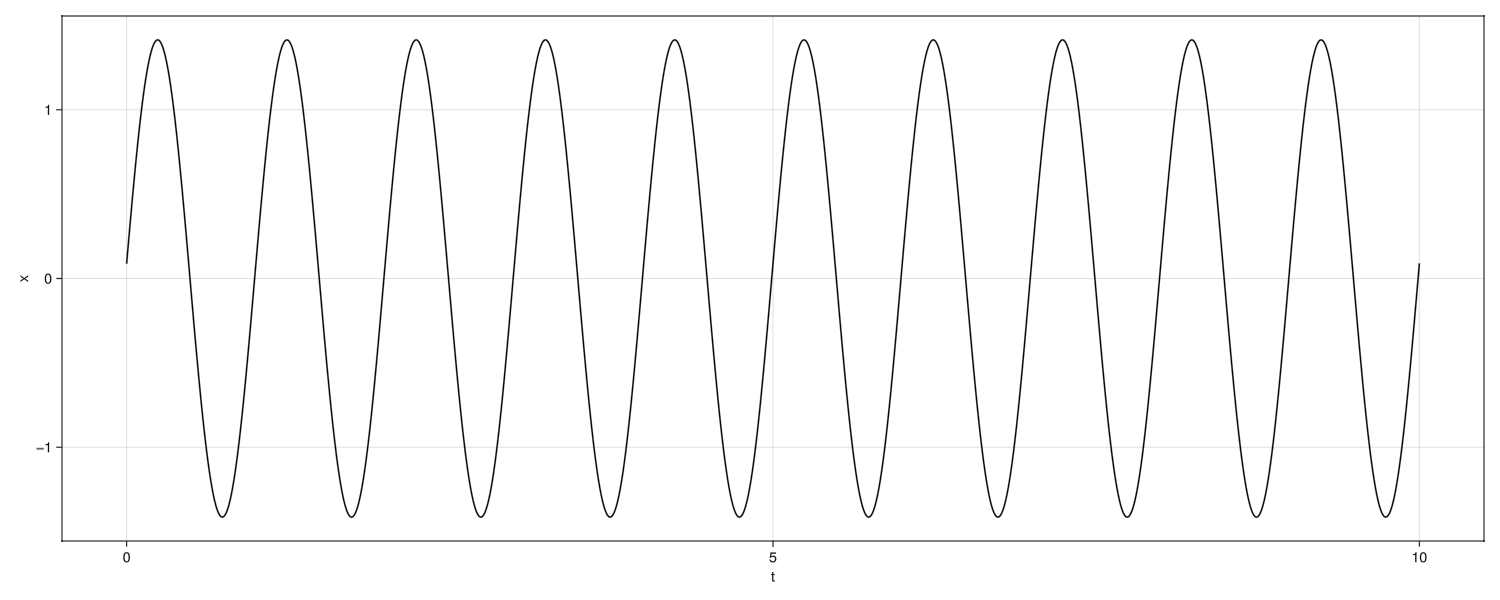

In [4]:
fig = Figure(size = (1500, 600));
ax = Axis(fig[1, 1], xlabel = "t", ylabel = "x");

line = lines!(ax, ts, xs[2:end], color = :black);

save("assets/lecture-1/harmonic-oscillator.png", fig);
display("image/png", read("assets/lecture-1/harmonic-oscillator.png"));

<div align="center">

###  Osciladores amortecidos

</div>


No regime amortecido de oscilações, não há campo externo aplicado, e a oscilação ocorre apenas nas vizinhanças do equilíbrio estável do poço de potencial gerado pela estrutura do material mas uma força de arrasto que resiste ao movimento proporcional à velocidade, ou seja, a dinâmica é regida pela seguinte equação

$$
    \ddot{x} + 2\zeta\dot{x} + \omega_0^2x = 0\text{,}
$$

Podemos notar que o operador $\ddot{\ast} + 2\zeta\dot{\ast} + \omega_0^2 = (\ddot{\ast} + 2\zeta\dot{\ast} + \zeta^2) + \omega_0^2 - \zeta^2 = (\dot{\ast} + \zeta)^2 + \omega_0^2 - \zeta^2 = (\dot{\ast} + \zeta + \imath \sqrt{\omega_0^2 - \zeta^2})(\dot{\ast} + \zeta - \imath \sqrt{\omega_0^2 - \zeta^2})$, assim quaisquer solução será expandida pela combinação linear de $exp((-\zeta \pm \imath\omega) t)$ onde $\omega = \sqrt{\omega_0^2 - \zeta^2}$, ou seja, existem $A_\pm \in \mathbb{C}$ tais que:

$$
    x(t) = A_- exp((-\zeta - \imath\omega) t) + A_+ exp((-\zeta + \imath\omega) t)\text{,}
$$

ou equivalentemente,

$$
    x(t) = A_- exp(-\zeta t) exp(- \imath\omega t) + A_+ exp(-\zeta t) exp(+ \imath\omega t)\text{.}
$$

<div align="center">

####  Regime subamortecido

</div>

No regime subamortecido $\omega_0 > \zeta$ assim $\omega = \sqrt{\omega_0^2 - \zeta^2} \in \mathbb{R}$, assim, substituindo $exp(\pm\imath\theta) = cos(\theta) \pm \imath sin(\theta)$, obtemos:

$$
    x(t) = (A_+ + A_-)exp(-\zeta t) cos(\omega t) + \imath (A_+ - A_-)exp(-\zeta t) sin(\omega t)\text{,}
$$

impondo $x(t = 0) = x_0$ e $v(t = 0) = v_0$, segue que:

$$
    \begin{cases}
        A_+ + A_- = x_0\text{,}\\
        A_+ - A_- = - \imath (v_0 + \zeta x_0) / \omega\text{,}
    \end{cases}
$$

assim:

$$
    x(t) = x_0exp(-\zeta t) cos(\omega t) + ((v_0 + \zeta x_0) / \omega)exp(-\zeta t) sin(\omega t)\text{,}
$$

de modo que tomando $A = \sqrt{x_0^2 + ((v_0 + \zeta x_0) / \omega)^2}$, ao notar que $(x_0 / A)^2 + ((v_0 + \zeta x_0) / A\omega)^2 = 1$ podemos afirmar que existe $\phi = arctg((v_0 + \zeta x_0) /\omega x_0)$ tal que $x_0 = Acos(\phi)$ e $v_0 + \zeta x_0 = A \omega sin(\phi)$, ou seja:

$$
    x(t) = Aexp(-\zeta t) cos(\phi)cos(\omega t) + Aexp(-\zeta t) sin(\phi)sin(\omega t)\text{,}
$$

assim, relembrando que $cos(a - b) = cos(a)cos(b) + sin(b)sin(a)$ obtemos:

$$
    x(t) = Aexp(-\zeta t) cos(\omega t - \phi)\text{,}
$$

apresentando assim por comportamento mecânico, um movimento oscilatório simples cuja amplitude decai exponencialmente com o tempo.

In [5]:
Φ = mech.dampedHarmonicOscillator(Δx, v_0, ω_0, ζ_sub);

fig = Figure(size = (1500, 600));
ax = Axis(fig[1, 1], xlabel = "x", ylabel = "y", limits = ((-5, +5), (-2.5, +2.5)));

Points = [(Φ.x, 0)];
xs = [Φ.x];

trajectory = lines!(ax, Points, color = :gray, linestyle = :dash);
point = scatter!(ax, [(Φ.x, 0)], markersize = 15, color = :black);

display(fig);
record(fig, "assets/lecture-1/underdamped-harmonic-oscillator.gif", ts; framerate=15) do t
    global Φ, Points;
    mech.evolve(Φ, dt);

    push!(Points, (Φ.x, 0))
    push!(xs, Φ.x)

    if length(Points) > 15
        popfirst!(Points);
    end

    trajectory[1][] = Points;
    point[1][] = [(Φ.x, 0)];

    display(fig);
end;

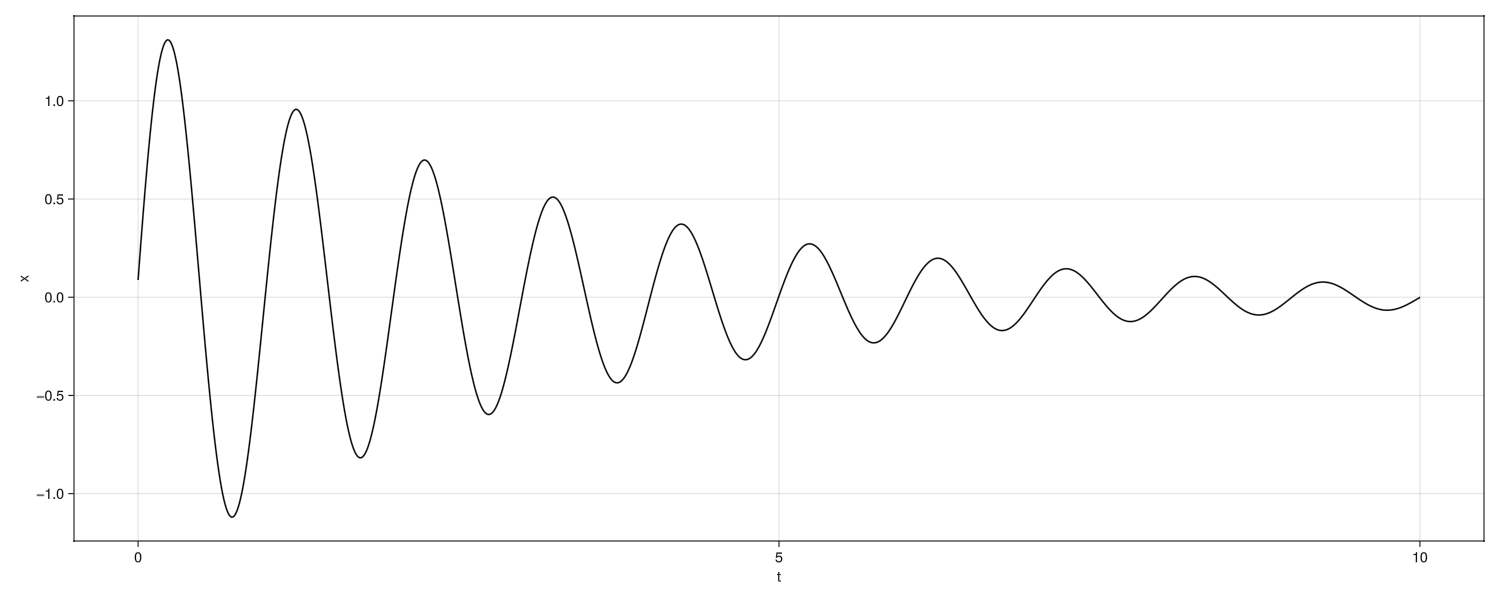

In [6]:
fig = Figure(size = (1500, 600));
ax = Axis(fig[1, 1], xlabel = "t", ylabel = "x");

line = lines!(ax, ts, xs[2:end], color = :black);

save("assets/lecture-1/underdamped-harmonic-oscillator.png", fig);
display("image/png", read("assets/lecture-1/underdamped-harmonic-oscillator.png"));

<div align="center">

####  Regime criticamente amortecido

</div>

No regime criticamente amortecido ($\omega_0 = \zeta$), $exp(-\zeta t)$ é solução mas não é suficiente para expandir o espaço de soluções, assim é necessário que obtenhamos mais uma solução linearmente independente. Faremos isso notando que $(\dot{\ast} + \zeta)exp(-\zeta t) = 0$ assim, para obtermos a solução de

$$
    (\dot{\ast} + \zeta)^2 x = (\dot{\ast} + \zeta) \left[(\dot{\ast} + \zeta) x\right] = 0\text{,}
$$

podemos encontrar uma solução tal que $(\dot{\ast} + \zeta) f = exp(-\zeta t)$, notando que $(\dot{\ast} + \zeta) f = exp(-\zeta t) (d{exp(+\zeta t) f}/dt)$, obtemos que:

$$
    \frac{d}{dt}(exp(\zeta t) f) = 1 \text{,}
$$

assim, $exp(\zeta t) f = t + \alpha$, ou seja, $f(t) = t exp(-\zeta t)$ é também solução da equação diferencial (tomamos a constante de primitivação $\alpha = 0$ apenas por simplicidade, o que não causa nenhuma perda de generalidade).

>   **Independência linear das soluções**
>
>   >   Para provar que $exp(-\zeta t)$ e $t exp(-\zeta t)$ são linearmente independentes, mostremos que as coordenadas da função nula só admite a solução trivial:
>   >
>   >   $$
>   >       0 = \alpha exp(-\zeta t) + \beta t exp(-\zeta t) = (\alpha + \beta t) exp(-\zeta t) \Leftrightarrow \alpha + \beta t = 0 \Leftrightarrow \alpha = \beta = 0 \text{.}
>   >   $$

dessa forma, quaisquer soluções podem ser expandidas da seguinte forma:

$$
    x(t) = (A_0 + A_1 t) exp(-\zeta t)\text{,}
$$

impondo $x(t = 0) = x_0$ e $v(t = 0) = v_0$, segue que:

$$
    \begin{cases}
        A_0 = x_0\text{,}\\
        A_1 = v_0 + \zeta x_0\text{,}
    \end{cases}
$$

assim:

$$
    x(t) = \left[x_0(1 + \zeta t) + v_0 t\right] exp(-\zeta t) \text{,}
$$

apresentando assim por comportamento mecânico, um crescimento linear seguido de um decaimento exponencial com o tempo.

In [7]:
Φ = mech.dampedHarmonicOscillator(Δx, v_0, ω_0, ζ_crt);

fig = Figure(size = (1500, 600));
ax = Axis(fig[1, 1], xlabel = "x", ylabel = "y", limits = ((-5, +5), (-2.5, +2.5)));

Points = [(Φ.x, 0)];
xs = [Φ.x];

trajectory = lines!(ax, Points, color = :gray, linestyle = :dash);
point = scatter!(ax, [(Φ.x, 0)], markersize = 15, color = :black);

display(fig);
record(fig, "assets/lecture-1/critically-damped-harmonic-oscillator.gif", ts; framerate=15) do t
    global Φ, Points;
    mech.evolve(Φ, dt);

    push!(Points, (Φ.x, 0))
    push!(xs, Φ.x)

    if length(Points) > 15
        popfirst!(Points);
    end

    trajectory[1][] = Points;
    point[1][] = [(Φ.x, 0)];

    display(fig);
end;

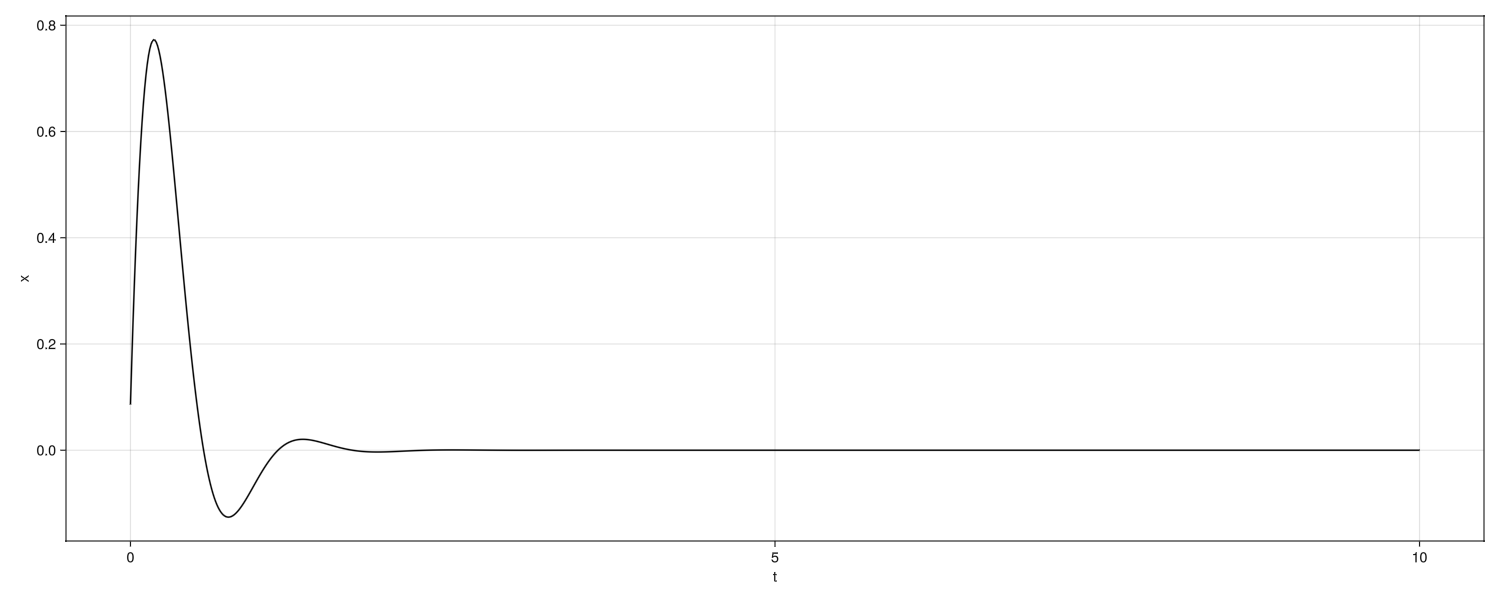

In [8]:
fig = Figure(size = (1500, 600));
ax = Axis(fig[1, 1], xlabel = "t", ylabel = "x");

line = lines!(ax, ts, xs[2:end], color = :black);

save("assets/lecture-1/critically-damped-harmonic-oscillator.png", fig);
display("image/png", read("assets/lecture-1/critically-damped-harmonic-oscillator.png"));

<div align="center">

####  Regime superamortecido

</div>

No regime superamortecido $\omega_0 < \zeta$ assim $\omega = \imath\sqrt{\zeta^2 - \omega_0^2} \in \mathbb{C}$, assim, substituindo $exp(\pm\imath\theta) = cos(\theta) \pm \imath sin(\theta)$, obtemos:

$$
    x(t) = (A_+ + A_-)exp(-\zeta t) cos(\omega t) + \imath (A_+ - A_-)exp(-\zeta t) sin(\omega t)\text{,}
$$

definindo $\omega = \imath\tilde{\omega}$ e utilizando que $sin(\imath x) = \imath sinh(x)$ e $cos(\imath x) = cosh(x)$, obtemos:

$$
    x(t) = (A_+ + A_-)exp(-\zeta t) cosh(\tilde\omega t) - (A_+ - A_-)exp(-\zeta t) sinh(\tilde\omega t)\text{,}
$$

impondo $x(t = 0) = x_0$ e $v(t = 0) = v_0$, segue que:

$$
    \begin{cases}
        A_+ + A_- = x_0\text{,}\\
        A_+ - A_- = -(v_0 + \zeta x_0) / \tilde\omega\text{,}
    \end{cases}
$$

assim:

$$
    x(t) = x_0exp(-\zeta t) cosh(\tilde\omega t) + ((v_0 + \zeta x_0) / \tilde\omega) exp(-\zeta t) sinh(\tilde\omega t)\text{,}
$$

de modo que tomando $A = \sqrt{x_0^2 - ((v_0 + \zeta x_0) / \tilde\omega)^2}$, ao notar que $(x_0 / A)^2 - ((v_0 + \zeta x_0) / A\tilde\omega)^2 = 1$ podemos afirmar que existe $\eta = -arctgh((v_0 + \zeta x_0) / \tilde\omega x_0)$ tal que $x_0 = +A cosh(\eta)$ e $v_0 + \zeta x_0 = -A \tilde\omega sinh(\eta)$, ou seja:

$$
    x(t) = Aexp(-\zeta t) cosh(\eta)cosh(\omega t) - Aexp(-\zeta t) sinh(\eta)sinh(\omega t)\text{,}
$$

assim, relembrando que $cosh(a - b) = cosh(a)cosh(b) - sinh(a)sinh(n)$ obtemos:

$$
    x(t) = Aexp(-\zeta t) cosh(\tilde\omega t - \eta)\text{,}
$$

apresentando assim por comportamento mecânico, um que apresenta crescimento quase exponencial, a príncipio, mas rapidamente começa a decair exponencialmente com o tempo.

In [9]:
Φ = mech.dampedHarmonicOscillator(Δx, v_0, ω_0, ζ_sup);

fig = Figure(size = (1500, 600));
ax = Axis(fig[1, 1], xlabel = "x", ylabel = "y", limits = ((-5, +5), (-2.5, +2.5)));

Points = [(Φ.x, 0)];
xs = [Φ.x];

trajectory = lines!(ax, Points, color = :gray, linestyle = :dash);
point = scatter!(ax, [(Φ.x, 0)], markersize = 15, color = :black);

display(fig);
record(fig, "assets/lecture-1/overdamped-harmonic-oscillator.gif", ts; framerate=15) do t
    global Φ, Points;
    mech.evolve(Φ, dt);

    push!(Points, (Φ.x, 0));
    push!(xs, Φ.x);

    if length(Points) > 15
        popfirst!(Points);
    end

    trajectory[1][] = Points;
    point[1][] = [(Φ.x, 0)];

    display(fig);
end;

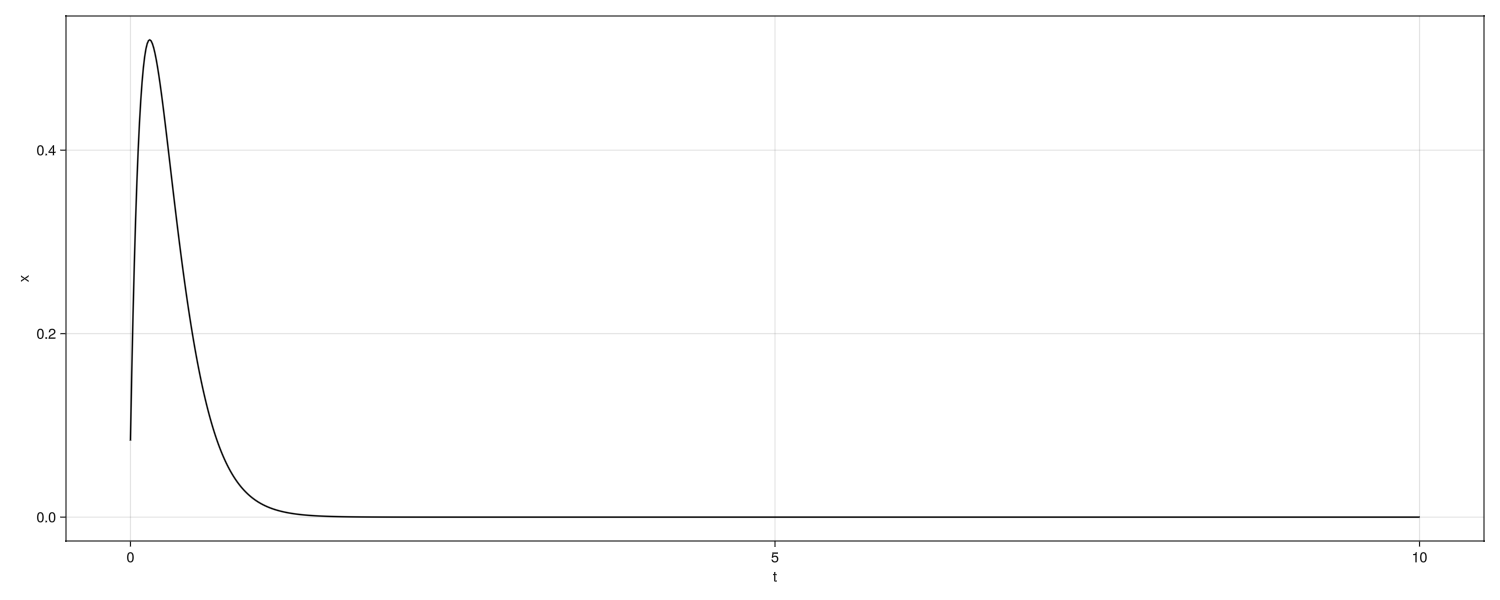

In [10]:
fig = Figure(size = (1500, 600));
ax = Axis(fig[1, 1], xlabel = "t", ylabel = "x");

line = lines!(ax, ts, xs[2:end], color = :black);

save("assets/lecture-1/overdamped-harmonic-oscillator.png", fig);
display("image/png", read("assets/lecture-1/overdamped-harmonic-oscillator.png"));

<div align="center">

###  Osciladores forçados

</div>

No regime de oscilações forçadas, ademais às forças de restituição e arrasto há também uma força de impulsão (campo elétrico em nosso modelo), sendo assim governado pela seguinte equação:

$$
    \ddot{x} + 2\zeta\dot{x} + \omega_0^2x = -\frac{e}{m}E(t)\text{.}
$$

assim, tomando que estamos no regime superamortecido $\mathcal{G}(t) = \Theta(t) exp(-\zeta t) sinh(\omega t)/\omega$ é a [função de Green](https://en.wikipedia.org/wiki/Green's_function) para este operador diferencial, ou seja,

$$
    \ddot{\mathcal{G}} + 2\zeta\dot{\mathcal{G}} + \omega_0^2 \mathcal{G} = \delta(z)
$$

assim, podemos obter a solução para o oscilador forçado notando que, sendo $x^{(0)}(t)$ a solução do oscilador superamortecido, então

$$
    x(t) = x^{(0)}(t) - \frac{e}{m} \int_{-\infty}^{+\infty} d\tau \mathcal{G}(t - \tau) E(\tau) \text{,}
$$

é a solução do oscilador forçado.

>   **Demonstração da válidade da solução**
>   >
>   >   aplicando o operador diferencial em $x(t)$ temos:
>   >
>   >   $$
>   >       \left(\ddot{\ast} + 2\zeta\dot{\ast} + \omega_0^2\right)x(t) = \left(\ddot{\ast} + 2\zeta\dot{\ast} + \omega_0^2\right)x^{(0)}(t) - \frac{e}{m} \left(\ddot{\ast} + 2\zeta\dot{\ast} + \omega_0^2\right)\int_{-\infty}^{+\infty} d\tau \mathcal{G}(t - \tau) E(\tau) \text{,}
>   >   $$
>   >
>   >   dado que $\left(\ddot{\ast} + 2\zeta\dot{\ast} + \omega_0^2\right)x^{(0)}(t) = 0$, temos que
>   >
>   >   $$
>   >       \left(\ddot{\ast} + 2\zeta\dot{\ast} + \omega_0^2\right)x(t) = - \frac{e}{m} \int_{-\infty}^{+\infty} d\tau \left(\ddot{\ast} + 2\zeta\dot{\ast} + \omega_0^2\right)\mathcal{G}(t - \tau) E(\tau) \text{,}
>   >   $$
>   >
>   >   utilizando que $\mathcal{G}$ é função de Green, discorre que
>   >
>   >   $$
>   >       \left(\ddot{\ast} + 2\zeta\dot{\ast} + \omega_0^2\right)x(t) = - \frac{e}{m} \int_{-\infty}^{+\infty} d\tau \delta(t - \tau) E(\tau) = -\frac{e}{m}E(t)\text{,}
>   >   $$

Assim, para exemplificar, computemos a convolução de um impulso elétrico senoidal com frequência $\omega_d$ a função de Green

$$
    \Delta x(t) = - \frac{e}{m\omega} \int_{-\infty}^{+\infty} d\tau \Theta(t - \tau)exp(-\zeta (t - \tau)) sinh(\omega (t - \tau)) cos(\omega_d \tau)\text{,}
$$

utilizando que $sinh(x) = (exp(x) - exp(-x))/2$ e o filtro da função de Heavside, obtemos

$$
    \Delta x(t) = - \frac{e}{2m\omega} \int_{-\infty}^{t} d\tau (exp(-(\zeta - \omega) (t - \tau)) - exp(-(\zeta + \omega) (t - \tau))) cos(\omega_d \tau)\text{,}
$$

utilizando que $\int_{-\infty}^{t} d\tau exp(- \alpha (t - \tau)) cos(\omega_d \tau) = (\omega_d sin(\omega_d t) + \alpha cos(\omega_d t))/(\omega_d^2 + \alpha^2)$ segue que

$$
    \Delta x(t) = - \frac{e}{2m\omega} (\frac{\omega_d sin(\omega_d t) + (\zeta - \omega) cos(\omega_d t)}{\omega_d^2 + (\zeta - \omega)^2} - \frac{\omega_d sin(\omega_d t) + (\zeta + \omega) cos(\omega_d t)}{\omega_d^2 + (\zeta + \omega)^2})\text{,}
$$

ou equivalentemente,

$$
    \Delta x(t) = - \frac{e}{2m\omega} \left[
        \left(\frac{\omega_d}{\omega_d^2 + (\zeta - \omega)^2} - \frac{\omega_d}{\omega_d^2 + (\zeta + \omega)^2}\right) sin(\omega_d t) +
        \left(\frac{\zeta - \omega}{\omega_d^2 + (\zeta - \omega)^2} - \frac{\zeta + \omega}{\omega_d^2 + (\zeta + \omega)^2}\right) cos(\omega_d t)
    \right]\text{,}
$$

ou ainda,

$$
    \Delta x(t) = \frac{e}{m (\omega_d^2 + (\zeta - \omega)^2)(\omega_d^2 + (\zeta - \omega)^2)} \left[-2\zeta\omega_d sin(\omega_d t) + (\zeta^2 - \omega^2) cos(\omega_d t)\right]\text{,}
$$

por fim, definindo $A = \sqrt{4\zeta^2\omega_d^2 + (\zeta^2 - \omega^2)^2}$, podemos notar que $(4\zeta^2\omega_d^2/A)^2 + ((\zeta^2 - \omega^2)/A)^2 = 1$ e assim afirmar que existe $\phi = -arctg(2\zeta\omega_d / (\zeta^2 - \omega^2))$ tal que $2\zeta\omega_d = - A sin(\phi)$ e $\zeta^2 - \omega^2 = A cos(\phi)$, ou seja:

$$
    \Delta x(t) = \frac{Ae}{m (\omega_d^2 + (\zeta - \omega)^2)(\omega_d^2 + (\zeta - \omega)^2)} \left[sin(\phi) sin(\omega_d t) + cos(\phi) cos(\omega_d t)\right]\text{,}
$$

assim, relembrando que $cos(a - b) = cos(a)cos(b) + sin(b)sin(a)$ obtemos:

$$
    \Delta x(t) = \frac{Ae}{m (\omega_d^2 + (\zeta - \omega)^2)(\omega_d^2 + (\zeta - \omega)^2)} cos(\omega_d t - \phi)\text{,}
$$

de modo que, lembrando que o comportamento amortecido decai exponencialmente, oscilações de mesma frequência que o campo elétrico serão predominantes após certo intervalo de tempo.

In [11]:
Φ = mech.drivenHarmonicOscillator(Δx, v_0, ω_0, ζ_drv, drivingField);

fig = Figure(size = (1500, 600));
ax = Axis(fig[1, 1], xlabel = "x", ylabel = "y", limits = ((-5, +5), (-2.5, +2.5)));

Points = [(Φ.x, 0)];
xs = [Φ.x];

trajectory = lines!(ax, Points, color = :gray, linestyle = :dash);
point = scatter!(ax, [(Φ.x, 0)], markersize = 15, color = :black);

display(fig);
record(fig, "assets/lecture-1/driven-harmonic-oscillator.gif", ts; framerate=15) do t
    global Φ, Points;
    mech.evolve(Φ, dt);

    push!(Points, (Φ.x, 0));
    push!(xs, Φ.x);

    if length(Points) > 15
        popfirst!(Points);
    end

    trajectory[1][] = Points;
    point[1][] = [(Φ.x, 0)];

    display(fig);
end;

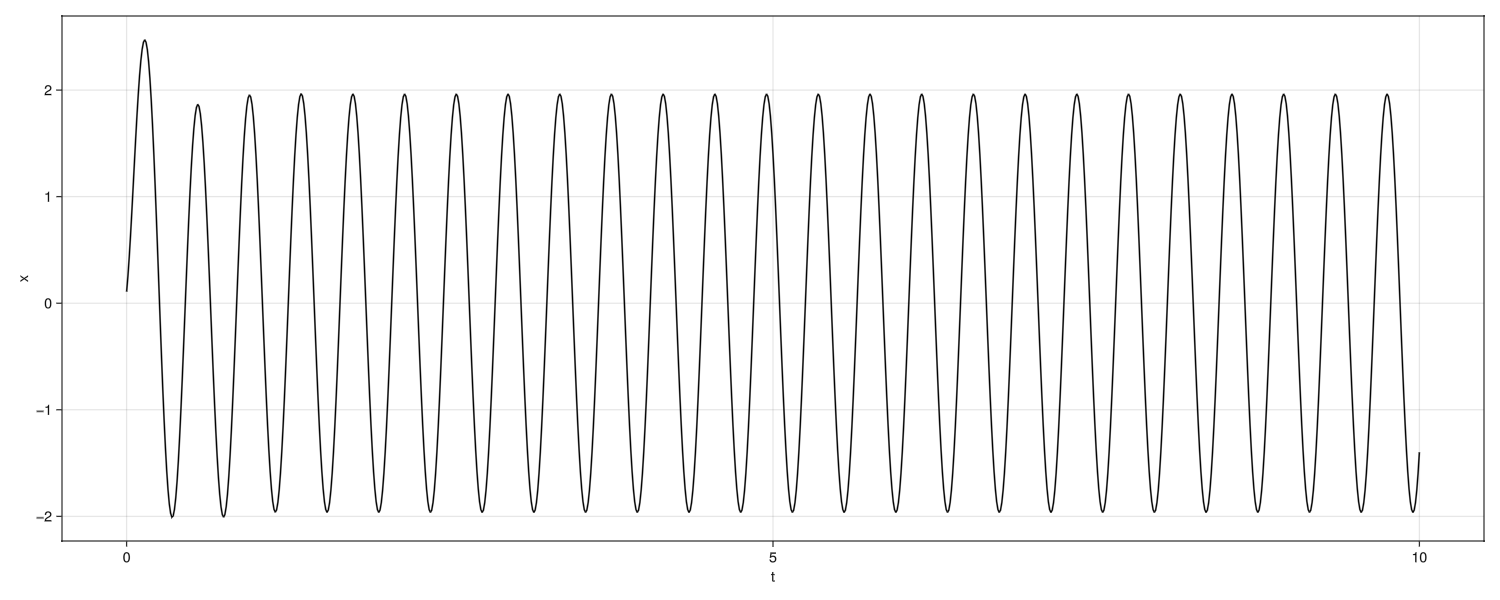

In [12]:
fig = Figure(size = (1500, 600));
ax = Axis(fig[1, 1], xlabel = "t", ylabel = "x");

line = lines!(ax, ts, xs[2:end], color = :black);

save("assets/lecture-1/driven-harmonic-oscillator.png", fig);
display("image/png", read("assets/lecture-1/driven-harmonic-oscillator.png"));

<div align="center">

###  Osciladores forçados não-lineares

</div>

In [13]:
Φ = mech.anharmonicOscillator(Δx, v_0, ω_0, ζ_drv, drivingField, nonlinearOscillation);

fig = Figure(size=(1600, 600));
ax = Axis(fig[1, 1], xlabel="x", ylabel="y", limits=((-5, +5), (-2.5, +2.5)));

Points = [(Φ.x, 0)];
xs = [Φ.x];

trajectory = lines!(ax, Points, color=:gray, linestyle=:dash);
point = scatter!(ax, [(Φ.x, 0)], markersize=15, color=:black);

display(fig);
record(fig, "assets/lecture-1/anharmonic-oscillator.gif", ts; framerate=15) do t
    global Φ, Points
    mech.evolve(Φ, dt)

    push!(Points, (Φ.x, 0))
    push!(xs, Φ.x)

    if length(Points) > 15
        popfirst!(Points)
    end

    trajectory[1][] = Points
    point[1][] = [(Φ.x, 0)]

    display(fig)
end;

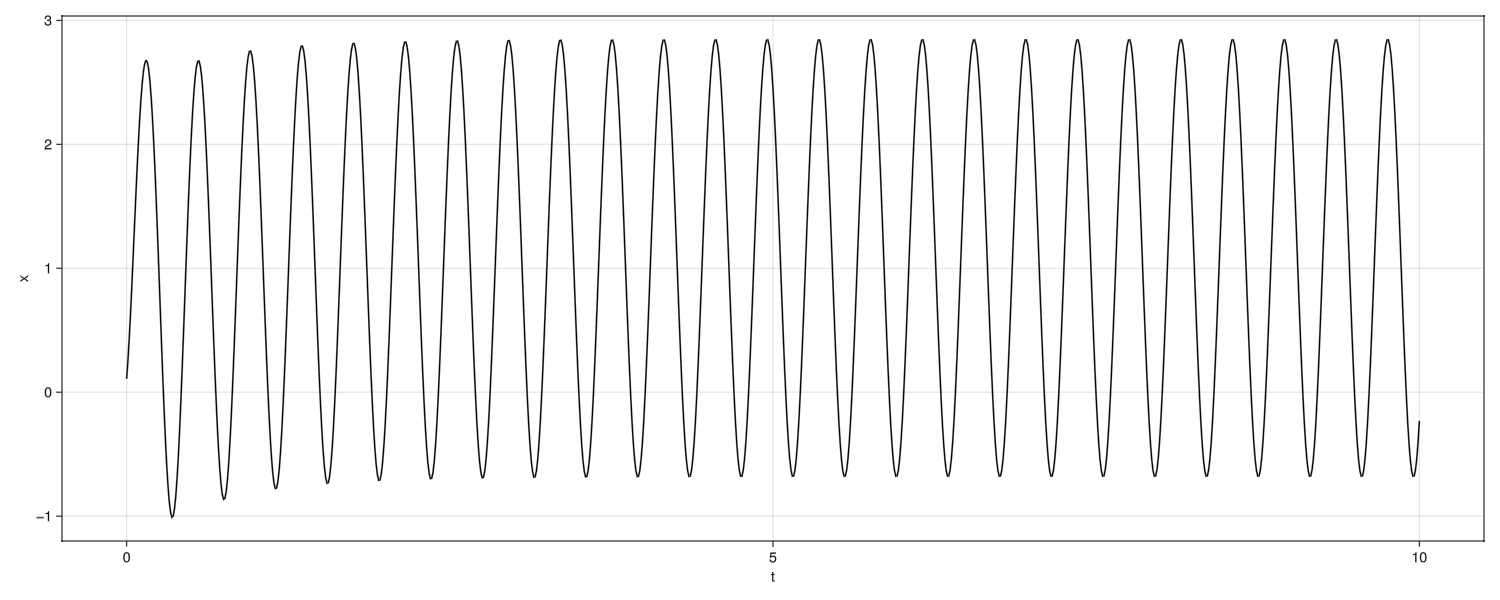

In [14]:
fig = Figure(size = (1500, 600));
ax = Axis(fig[1, 1], xlabel = "t", ylabel = "x");

line = lines!(ax, ts, xs[2:end], color=:black);

save("assets/lecture-1/anharmonic-oscillator.png", fig);
display("image/png", read("assets/lecture-1/anharmonic-oscillator.png"));